# Predicting heart disease using machine learning

This notebook looks into using python based machine learning and data science 
in an attempt to build a model capable of predicting whther or not someone has a heart disease
based on their medical attributes. 

I am going to take the following approach
1. Problem definition
2. Data
3. Evaluation
4. Features 
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they heart
disease?

## 2. Data

This dataset is an open source available on kaggle: https://www.kaggle.com/ronitf/heart-disease-uci


## 3. Evaluation

> The model is a success if the accuracy is above 95% at predicting whether or not a patient has heart disease

## 4. Features

#####  Dataset dictionary

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect



In [14]:
# Preparing the tool box

# Importing EDA(exploratory data analysis) and plotting libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [24]:
df = pd.read_csv('heart-disease.csv')
df = df.iloc[:,1:]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Exploration(EDA)

The goal here is to find out more about the data and become well verxed
with the data

1. What are you trying to solve?
2. What kind of data do we have and how do we treat different types.
3. What's missing from the data and how do you deal with it.
4. Where are outliers and how should you handle them?
5. How can you add, change or remove features to get more of your data?


In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
# Check if there are any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [32]:
# Check the target values
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

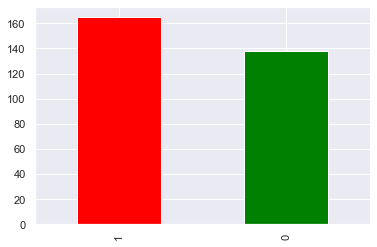

In [34]:
df['target'].value_counts().plot(kind='bar',color=['red','green']);

In [35]:
# Check for any other information associated with this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [36]:
# Check data distribution and associated stats
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease frequency according to sex

In [39]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [40]:
# Comparing the target column with sex column

pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


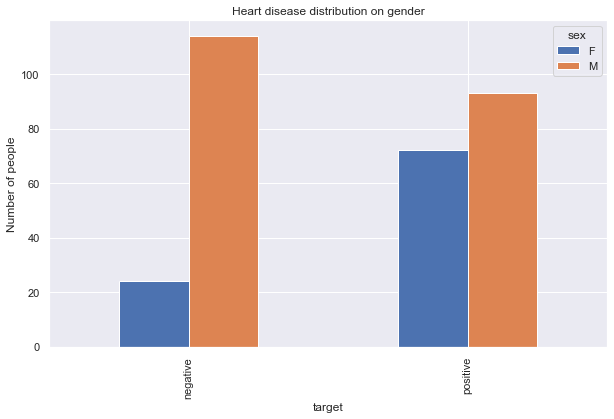

In [53]:
# Create a plot of crosstab
pd.crosstab(df.target.map({0:'negative',1:'positive'}),df.sex.map({0:'F',1:'M'})).plot(kind='bar', figsize=(10,6))
plt.title('Heart disease distribution on gender')
plt.ylabel('Number of people');

### Age vs heart rate

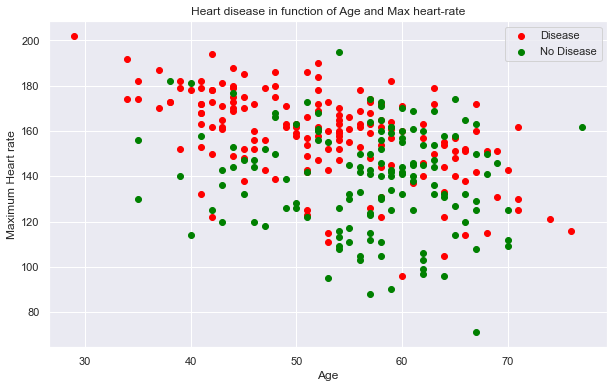

In [65]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            color='red',
            label = 'Disease')

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            color='green',
            label='No Disease')

# Add some helpful info
plt.title('Heart disease in function of Age and Max heart-rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart rate')
plt.legend()

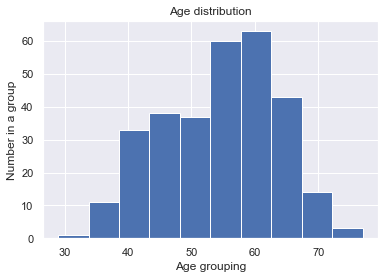

In [68]:
# Check the distribution of the age column

plt.hist(df.age)
plt.xlabel('Age grouping')
plt.ylabel('Number in a group')
plt.title('Age distribution');

In [73]:
# Check chest pains and target

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


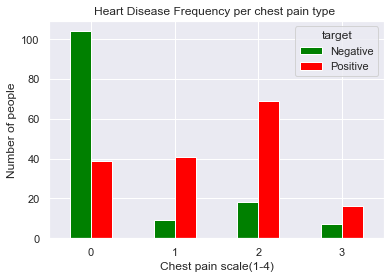

In [262]:
# Make the crosstab more visual
pd.crosstab(df.cp,
            df.target.map({0:'Negative',1:'Positive'})).plot(kind= 'bar',color=['green','red'])

plt.xlabel('Chest pain scale(1-4)')
plt.ylabel('Number of people')
plt.title('Heart Disease Frequency per chest pain type ')
plt.xticks(rotation=0);

In [88]:
# Check out the correlation between the target and the independent variables

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


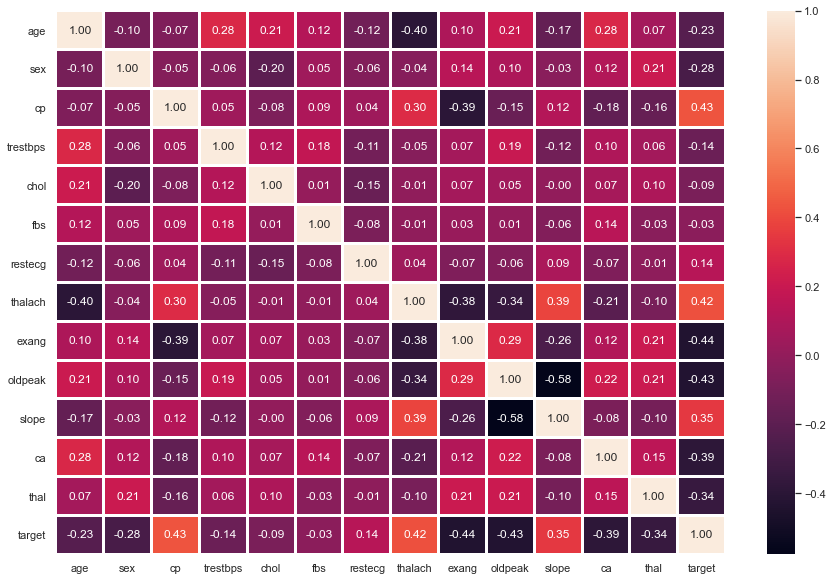

In [89]:
# Prettyfing the correlation matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                lw=2,
                fmt=".2f")

## 5. Modelling

In [94]:
# Split data into X and y

X = df.drop('target',axis=1)
y = df['target']

In [102]:
# Creating the train and test set
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y, 
                                                 test_size = 0.2)

#### Building a machine learning model and training it is the next step
I am going to use 3 models and then compare them
1. LogisticRegression
2. RandomForestClassifier
3. KNeighborsClassifier

In [103]:
# Put models in a dictionary
model_dict = {'LogisticRegression':LogisticRegression(),
              'RandomForestClassifier': RandomForestClassifier(),
              'KNeighbors':KNeighborsClassifier()
             }

# Function to fit and score models
def fit_and_score(model_dict,X_train,X_test,y_train,y_test):
    """
    Fit and score the models.
    X_train : training features
    X_test  : testing features
    y_train : training labels
    Y-test  : testing labels 
    
    """
    
    # set a random seed for reproducibilty
    np.random.seed(42)
    
    # Create a dictionary for results
    model_results = {}
    
    for model_name,model in model_dict.items():
        print(f'Fitting for {model_name}...')
        model.fit(X_train,y_train)
        print(f'Scoring for {model_name}...')
        model_results[model_name] = model.score(X_test,y_test)
        
    return model_results


In [104]:
model_scores = fit_and_score(model_dict = model_dict,
              X_train = X_train,
              X_test = X_test ,
              y_train = y_train,
              y_test = y_test)
model_scores 


Fitting for LogisticRegression...


C:\Users\USER\Desktop\heart_disease\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Scoring for LogisticRegression...
Fitting for RandomForestClassifier...
Scoring for RandomForestClassifier...
Fitting for KNeighbors...
Scoring for KNeighbors...


{'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8360655737704918,
 'KNeighbors': 0.6885245901639344}

## Model Comparison

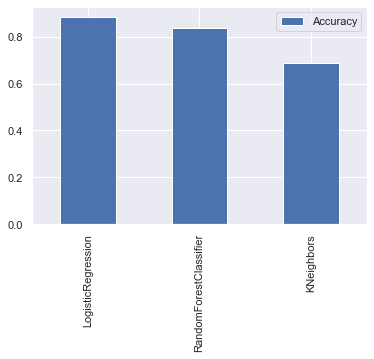

In [107]:
model_compare = pd.DataFrame(model_scores, index = ['Accuracy'])
model_compare.T.plot.bar();

After this step, we have a baseline model. Now we are going to do the following

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation 
* precision
* recall
* f1 score
* classification report
* ROC curve 
* Area Under Curve (AUC)

In [122]:
#Tuning the KNN model by hand

training_scores = []
test_scores = []

# Create  list for different values for n-neighbors

neighbors = range(1,21)

# Setup KNN instance 
knn = KNeighborsClassifier()

# Loop through the different n_neighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    training_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

Maximum KNN test score attained: 75.41%


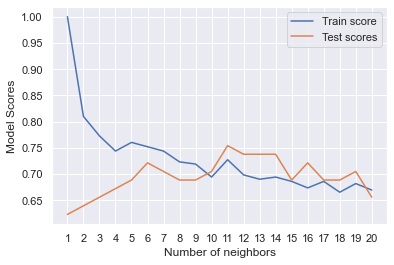

In [121]:
plt.plot(neighbors,training_scores, label='Train score')
plt.plot(neighbors,test_scores,label='Test scores')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Scores')
plt.xticks(list(range(1,21)))
plt.legend()

print(f'Maximum KNN test score attained: {max(test_scores)*100:.2f}%');


## Hyperparameter tuning with RandomizedSearchCV

* I am going to be using RandomizedSearchCV 

In [143]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {'C':np.logspace(-4,4,20),
               'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,50),
           'max_depth':[None,3,5,10,12],
           'min_samples_split':np.arange(2,20,2),
           'min_samples_leaf':np.arange(1,20,2)
          }

In [144]:
# Tune LogisticRegression using RSCV
np.random.seed(42)

# setup ramdom hyperparameter search for Logreg
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=2)

# Fit random hyperparameter serach model for LogisticRegression 
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.0001 ......................................
[CV] ....................... solver=liblinear, C=0.0001, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... solver=liblinear, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, C=0.00026366508987303583 ......................
[CV] ....... so

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.03359818286283781 .........................
[CV] .......... solver=liblinear, C=0.03359818286283781, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.08858667904100823 .........................
[CV] .......... solver=liblinear, C=0.08858667904100823, total=   0.0s
[CV] solver=liblinear, C=0.23357214690901212 .........................
[CV] .

[CV] ............ solver=liblinear, C=3792.690190732246, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s
[CV] solver=liblinear, C=10000.0 .....................................
[CV] ...................... solver=liblinear, C=10000.0, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=2)

In [145]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [146]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [153]:
# Now tuning RandomForestClassifier

np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=20,
                          verbose=2)

# Fit random hyperparameter serach model for RandomForestClassifier

rs_rf.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12, total=   0.7s
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12, total=   0.7s
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12 
[CV]  n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12, total=   0.7s
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12 
[CV]  n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12, total=   1.1s
[CV] n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12 
[CV]  n_estimators=510, min_samples_split=8, min_samples_leaf=1, max_depth=12, total=   0.7s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=10, min_samples_split=16, min_samples_leaf=9, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=16, 

[CV]  n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None, total=   0.3s
[CV] n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None 
[CV]  n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None, total=   0.3s
[CV] n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None 
[CV]  n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None, total=   0.3s
[CV] n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None 
[CV]  n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None, total=   0.3s
[CV] n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None 
[CV]  n_estimators=260, min_samples_split=8, min_samples_leaf=19, max_depth=None, total=   0.3s
[CV] n_estimators=460, min_samples_split=6, min_samples_leaf=9, max_depth=None 
[CV]  n_estimators=460, min_samples_split=6, min_samples_leaf=9, max_depth=None, total=   0.6s
[CV] n_estimators=460

[CV]  n_estimators=260, min_samples_split=16, min_samples_leaf=17, max_depth=3, total=   0.3s
[CV] n_estimators=260, min_samples_split=16, min_samples_leaf=17, max_depth=3 
[CV]  n_estimators=260, min_samples_split=16, min_samples_leaf=17, max_depth=3, total=   0.3s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   55.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 12],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [151]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_depth': 12}

In [152]:
# Score the model
rs_rf.score(X_test,y_test)

0.8524590163934426

## Hyperparameter tuning of the LogisticRegression model using GridSearchCV

In [154]:
# GridSearchCV hyperparameter tuning

log_reg_grid = {'C':np.logspace(-4,4,30),
                   'solver': ['liblinear']
                  }

# Setup grid hyperparameter search for LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)

# Fit the grid hyperparameter search model

gs_log_reg.fit(X_train,y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.5s finished


In [155]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [156]:
# Evaluate the grid search
gs_log_reg.score(X_test,y_test)

0.8852459016393442

## Evaluating the tuned machine learning classifier beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision,recall and f1-score

In [157]:
y_preds = gs_log_reg.predict(X_test)

### Plot ROC curve and calculate the AUC metric

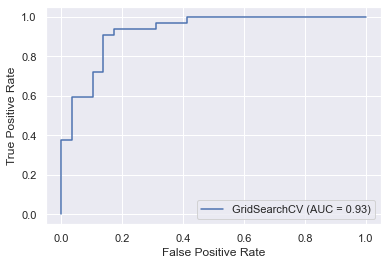

In [161]:
# Plot ROC curve and calculate the AUC metric
plot_roc_curve(gs_log_reg,
              X_test,
              y_test);

### Confusion matrix

In [162]:
# Confusion matrix
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


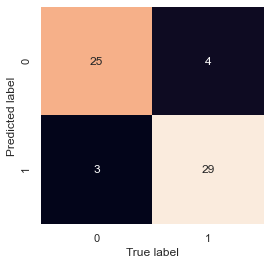

In [176]:
# Make confusion matrix more visual
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(y_test, y_preds)

## Classification report

In [170]:
# Classification report without using cross-validation
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [178]:
# Manual verification of precision and recall for 1
round((29/(29+4)),2), round((29/(29+3)),2)

(0.88, 0.91)

In [179]:
# Classification report using cross-validation
# Check best parameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [182]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.20433597178569418, 
                         solver = 'liblinear')

In [263]:
# Define a cross-validated function

def cross_validated_metrics(clf,X,y,a):
    metrics_list = ['accuracy','precision','recall','f1']
    scores_dict = {}
    for item in metrics_list :
        cv = cross_val_score(clf,
                        X,
                        y,
                        cv=a,
                        scoring=item)
        cv_calc = np.mean(cv)
        scores_dict[item] = round(cv_calc,2)
        
    return scores_dict

In [264]:
# Call the cross_validated function
cross_validated_metrics(clf,X,y,5)

{'accuracy': 0.85, 'precision': 0.82, 'recall': 0.93, 'f1': 0.87}

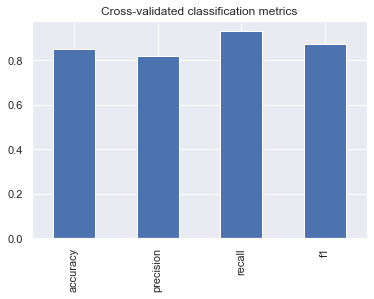

In [265]:
# Visualize the cross-validated matrix
cv_mertics = pd.DataFrame(cross_validated_metrics(clf,X,y,5),index=[0])
cv_mertics.T.plot(kind='bar',
                  legend=False, 
                  title='Cross-validated classification metrics');

### Feature importance 

Here I am asking myself which features contributed most to the outcomes of the model?



In [266]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [267]:
# Fit an instance of LogisticRegression
clf.fit(X_train,y_train)

# Check the coef_
clf.coef_

array([[ 0.00316814, -0.85915879,  0.66077333, -0.01157915, -0.00166042,
         0.04315323,  0.3142537 ,  0.02458377, -0.60360228, -0.56890704,
         0.45045561, -0.63681403, -0.678637  ]])

In [268]:
# Match the features to the coef's
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031681430581422636,
 'sex': -0.8591587915843361,
 'cp': 0.6607733309584161,
 'trestbps': -0.011579146182887249,
 'chol': -0.0016604157076315382,
 'fbs': 0.043153233077496723,
 'restecg': 0.3142537030842091,
 'thalach': 0.024583772280533506,
 'exang': -0.603602279496972,
 'oldpeak': -0.5689070374179865,
 'slope': 0.45045560796094686,
 'ca': -0.636814027820628,
 'thal': -0.6786369989902843}

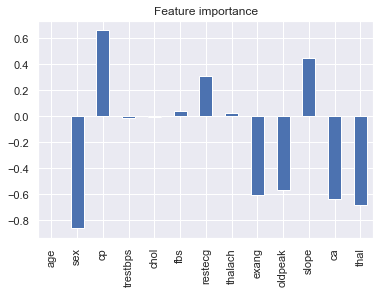

In [269]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind='bar',title= 'Feature importance',legend=False);